<a href="https://colab.research.google.com/github/Monika171/Chocolate-Bar-Recipe-Trend-Analysis/blob/main/Chocolate_bar_recipe_trend_analysis_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('chocolate-bar-recipe-trend-analysis-2020')
jovian.set_colab_id('1zvJbexqpF75fsl7XjtJP7rqKmzw9pOb1')

#  <center><font color=red><u>__CHOCOLATE BAR RECIPE TREND ANALYSIS<br>(2006-2020)__</u></font></center>
<br>

![](https://image.shutterstock.com/image-photo/chocolate-bar-pieces-cocoa-beans-600w-1303588735.jpg)

__Here we will study chocolate bar ingredient trends, preferences by companies and its rating. We will mostly use Numpy, Pandas to compute the results and, Matplotlib & Seaborn for plotting graphs. The dataset used in this project is taken from [kaggle.com](https://www.kaggle.com/soroushghaderi/chocolate-bar-2020?select=chocolate.csv) and contains data about 66 chocolate bar companies such as  'company', 'company_location', 'country_of_bean_origin',  'review_date', chocolate 'rating', 'cocoa_percent', common ingredients and tastes information.__
<br><br>
__<u>According to Flavors of Cacao Rating Scale</u>:__
<br>
4.0 - 5.0 &emsp;=&emsp; Outstanding<br>
3.5 - 3.9 &emsp;=&emsp; Highly Recommended<br>
3.0 - 3.49&ensp;&nbsp;=&emsp; Recommended<br>
2.0 - 2.9 &emsp;=&emsp; Disappointing<br>
1.0 - 1.9 &emsp;=&emsp; Unpleasant<br>

***

## <font color=blue><u>__Table of contents__</u></font> 
 * #### [Downloading the Dataset](#Downloading)
     * Python’s OS module
     * Pandas "read_csv” method
 * #### [Data Preparation and Cleaning](#PC)
     * .columns,.sample(), .shape, .sum()
     * .unique(), .apply(), lambda
     * .value_counts(), .info(), .describe()
 * #### [Exploratory Analysis and Visualization](#AV)
     * Company And Ingredients
     * Tastes
     * Percentage of Cocoa and Variation Over Years
     * Rating and Cocoa Percent
     * Correlation between different columns
 * #### [Questions and Answers](#QA)
     * How presence of cocoa butter and lecithin effect rating in latest three years (2018-2020)?
     * How much cocoa is actually preferred by top companies?
     * From which countries, top companies import cocoa beans?
     * What must have been the recipe of top rated chocolate in the year 2019?
     * What are the major regions of chocolate, companies of which, generally makes it to Top 50?
 * #### [Inferences and Conclusion](#IC)
 * #### [References and Future Work](#RF)

***

## <a id="Downloading"><font color=blue><u>__Downloading the Dataset__</u></font></a>
<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;"> -->
    
* Let's download our dataset from [kaggle.com](https://www.kaggle.com/soroushghaderi/chocolate-bar-2020?select=chocolate.csv) in our local computer folder for analysis or download the same using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)
* This data is in CSV format.
* This same original dataset will be later uploaded at [Jovial files section](https://jovian.ml/monika171/zerotopandas-course-project-starter-monika171/v/37/files/chocolate.csv) along with this project, using command:
```jovian.commit(project=project_name, files=['chocolate-bar-2020/chocolate.csv'])```
* If downloaded in a local computer, we create a local _Conda_ environment and install the required libraries by running the commands at terminal, for example:<br>
> ```conda create -n zerotopandas -y python=3.8``` <br>
> ```conda activate zerotopandas```<br>
> ```pip install jovian jupyter numpy pandas matplotlib seaborn --upgrade```<br>
>  We can now start the Jupyter notebook using command:<br>
```jupyter notebook```
    
<!-- </blockquote> -->

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
dataset_url = 'https://www.kaggle.com/soroushghaderi/chocolate-bar-2020' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./chocolate-bar-2020" (use force=True to force download)


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Now lets proceed by listing these files by looking into directory and check whether the data is actually downloaded succesfully earlier and is accessible.
    
<!-- </blockquote> -->

In [5]:
data_dir = './chocolate-bar-2020'

In [6]:
import os

In [7]:
os.listdir(data_dir)

['chocolate_taste_dataset.csv', 'chocolate.csv']

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->

To read the csv file, we will use ```pd.read_csv()``` function, where we will pass path to our csv file which we would like to use for this project.<br>
Let's call it ```chocolate_raw_df``` as this is just raw or unprocessed dataset now, on which further modifications will be done for it to be prepared for data analysis.
    
<!-- </blockquote> -->

In [8]:
import pandas as pd

In [9]:
chocolate_raw_df = pd.read_csv('chocolate-bar-2020/chocolate.csv', index_col='Unnamed: 0')
chocolate_raw_df

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Looks like there are 20 columns. Let's see all the columns using ```chocolate_raw_df.columns```    
    
<!-- </blockquote> -->

In [10]:
chocolate_raw_df.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')

***

## <a id="PC"><font color=blue><u>__Data Preparation and Cleaning__</u></font></a>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;"> -->
    
In this section, we select relevant data, explore various details such as shape, unique values, information about columns, its values, missing values, count the same, memory usage, sample the same etc. and make any appropriate changes if needed.
    
<!-- </blockquote> -->

 Let's select a subset of columns with the relevant data for our analysis.

In [11]:
selected_columns = [
    # Company and respective ratings
    'company',
    'company_location',
    'country_of_bean_origin', 
    'review_date',
    'rating',     
    # Ingredients
    'cocoa_percent',
    'counts_of_ingredients',   
    'cocoa_butter',
    'vanilla',
    'lecithin',
    'salt',
    'sugar',
    # Tastes
    'first_taste',
    'second_taste',
    'third_taste',
    'fourth_taste'
]


In [12]:
# lets check how many columns we have selected
len(selected_columns)

16

In [13]:
# We will be using copy() function to NOT modify original data frame
# and to actually create a separate one derived from original
chocolate_df = chocolate_raw_df[selected_columns].copy()
chocolate_df

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste,fourth_taste
0,5150,U.S.A,Madagascar,2019,3.75,76.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,cocoa,blackberry,full body,NaN
1,5150,U.S.A,Dominican republic,2019,3.50,76.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,cocoa,vegetal,savory,NaN
2,5150,U.S.A,Tanzania,2019,3.25,76.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,rich cocoa,fatty,bready,NaN
3,A. Morin,France,Peru,2012,3.75,63.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,fruity,melon,roasty,NaN
4,A. Morin,France,Bolivia,2012,3.50,70.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,Blend,2014,2.75,80.0,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,waxy,cloying,vegetal,NaN
2220,Zotter,Austria,Colombia,2017,3.75,75.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,strong nutty,marshmallow,NaN,NaN
2221,Zotter,Austria,Belize,2018,3.50,72.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,muted,roasty,accessible,NaN
2222,Zotter,Austria,Congo,2018,3.25,70.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,fatty,mild nuts,mild fruit,NaN


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Lets use ```pandas.DataFrame.shape``` here, which return's a tuple representing the dimensionality of the DataFrame.    
    
<!-- </blockquote> -->

In [14]:
chocolate_df.shape

(2224, 16)

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Now, looking into values in columns such as _cocoa_butter, vanilla, lecithin, salt and, sugar_ we can see some kind of similar variation in data of each column. Let's have a look at one of these:    
    
<!-- </blockquote> -->

In [15]:
chocolate_df.lecithin

0       have_not_lecithin
1       have_not_lecithin
2       have_not_lecithin
3           have_lecithin
4           have_lecithin
              ...        
2219    have_not_lecithin
2220    have_not_lecithin
2221    have_not_lecithin
2222    have_not_lecithin
2223    have_not_lecithin
Name: lecithin, Length: 2224, dtype: object

In [16]:
# Let's check unique values in this particular column 
chocolate_df.lecithin.unique()

array(['have_not_lecithin', 'have_lecithin'], dtype=object)

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
We can actually deal with these values and manually adjust the data type for each column on a case-by-case basis.
To make our further analysis easier, the best way is to change the values into boolean ```True``` and ```False```, where if _'not'_ is present in the string, it will be taken as _'False'_ to show 'absence' of an item and _'True'_ otherwise.
<br>
To carry these, we will use the functions below in our custom function _'change_to_boolean'_:
* ```pandas.DataFrame.apply``` <br>
> __Format:__ ```DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)```
> <br>Apply a function along an axis of the DataFrame.
* and ```lambda``` which represents an anonymous function, where if it is used with previous ```pd.Series.apply```, each element of the series is fed into this lambda function. Here we use this for our _if-else_ condition mentioned above.
> The result will be another ```pd.Series``` with each element run through that ```lambda```.

To check the output later and also to verify with original data, we will use<br>
```pandas.Series.value_counts```<br><br>
__Format:__ ```Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)```<br>
Returns a Series containing counts of unique values. The resulting object will be in descending order so the first element is the most frequently-occurring element. Excludes NA values by default.    
    
<!-- </blockquote> -->

In [17]:
def change_to_boolean(col_series):
    return col_series.apply(lambda x: False if 'not' in x else True)

In [18]:
# old values (to verify)
chocolate_df.cocoa_butter.value_counts()

have_cocoa_butter        1535
have_not_cocoa_butter     689
Name: cocoa_butter, dtype: int64

In [19]:
chocolate_df['cocoa_butter'] = change_to_boolean(chocolate_df['cocoa_butter'])
chocolate_df.cocoa_butter.value_counts()

True     1535
False     689
Name: cocoa_butter, dtype: int64

In [20]:
# old values (to verify)
chocolate_df.vanilla.value_counts()

have_not_vanila    1876
have_vanila         348
Name: vanilla, dtype: int64

In [21]:
chocolate_df['vanilla'] = change_to_boolean(chocolate_df['vanilla'])
chocolate_df.vanilla.value_counts()

False    1876
True      348
Name: vanilla, dtype: int64

In [22]:
# old values (to verify)
chocolate_df.lecithin.value_counts()

have_not_lecithin    1745
have_lecithin         479
Name: lecithin, dtype: int64

In [23]:
chocolate_df['lecithin'] = change_to_boolean(chocolate_df['lecithin'])
chocolate_df['lecithin'].value_counts()

False    1745
True      479
Name: lecithin, dtype: int64

In [24]:
# old values (to verify)
chocolate_df.salt.value_counts()

have_not_salt    2187
have_salt          37
Name: salt, dtype: int64

In [25]:
chocolate_df['salt'] = change_to_boolean(chocolate_df['salt'])
chocolate_df.salt.value_counts()

False    2187
True       37
Name: salt, dtype: int64

In [26]:
# old values (to verify)
chocolate_df.sugar.value_counts()

have_sugar        2142
have_not_sugar      82
Name: sugar, dtype: int64

In [27]:
chocolate_df['sugar'] = change_to_boolean(chocolate_df['sugar'])
chocolate_df.sugar.value_counts()

True     2142
False      82
Name: sugar, dtype: int64

In [28]:
chocolate_df

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste,fourth_taste
0,5150,U.S.A,Madagascar,2019,3.75,76.0,3,True,False,False,False,True,cocoa,blackberry,full body,NaN
1,5150,U.S.A,Dominican republic,2019,3.50,76.0,3,True,False,False,False,True,cocoa,vegetal,savory,NaN
2,5150,U.S.A,Tanzania,2019,3.25,76.0,3,True,False,False,False,True,rich cocoa,fatty,bready,NaN
3,A. Morin,France,Peru,2012,3.75,63.0,4,True,False,True,False,True,fruity,melon,roasty,NaN
4,A. Morin,France,Bolivia,2012,3.50,70.0,4,True,False,True,False,True,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,Blend,2014,2.75,80.0,4,True,False,False,True,False,waxy,cloying,vegetal,NaN
2220,Zotter,Austria,Colombia,2017,3.75,75.0,3,True,False,False,False,True,strong nutty,marshmallow,NaN,NaN
2221,Zotter,Austria,Belize,2018,3.50,72.0,3,True,False,False,False,True,muted,roasty,accessible,NaN
2222,Zotter,Austria,Congo,2018,3.25,70.0,3,True,False,False,False,True,fatty,mild nuts,mild fruit,NaN


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Let's now use ```pandas.DataFrame.info``` to print a concise summary of our DataFrame.
> __Format:__```DataFrame.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)```<br>
> This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.    
    
<!-- </blockquote> -->

In [29]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2223
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company                 2224 non-null   object 
 1   company_location        2224 non-null   object 
 2   country_of_bean_origin  2224 non-null   object 
 3   review_date             2224 non-null   int64  
 4   rating                  2224 non-null   float64
 5   cocoa_percent           2224 non-null   float64
 6   counts_of_ingredients   2224 non-null   int64  
 7   cocoa_butter            2224 non-null   bool   
 8   vanilla                 2224 non-null   bool   
 9   lecithin                2224 non-null   bool   
 10  salt                    2224 non-null   bool   
 11  sugar                   2224 non-null   bool   
 12  first_taste             2224 non-null   object 
 13  second_taste            2147 non-null   object 
 14  third_taste             1604 non-null   

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
We can also check missing values using ```pandas.DataFrame.isna```
> __Format:__ ```DataFrame.isna()```<br>
> Returns dataFrame: Mask of bool values for each element in DataFrame that indicates whether an element is not an NA value.

and hence, adding all to get _total sum_ of missing values in each column.    
    
<!-- </blockquote> -->

In [30]:
chocolate_df.isna().sum()

company                      0
company_location             0
country_of_bean_origin       0
review_date                  0
rating                       0
cocoa_percent                0
counts_of_ingredients        0
cocoa_butter                 0
vanilla                      0
lecithin                     0
salt                         0
sugar                        0
first_taste                  0
second_taste                77
third_taste                620
fourth_taste              1982
dtype: int64

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
We can also use ```pandas.DataFrame.describe``` to generate descriptive statistics.
> __Format:__ ```DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)[source]```

_Descriptive statistics_ include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding ```NaN``` values. Analyzes both numeric and object series, as well as ```DataFrame``` column sets of mixed data types.   
    
<!-- </blockquote> -->

In [31]:
chocolate_df.describe()

,review_date,rating,cocoa_percent,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000
mean,2013.857914,3.198561,71.493930,3.075989
std,3.582151,0.434329,5.278253,0.929875
min,2006.000000,1.000000,42.000000,1.000000
25%,2011.000000,3.000000,70.000000,2.000000
50%,2014.000000,3.250000,70.000000,3.000000
75%,2016.000000,3.500000,74.000000,4.000000
max,2020.000000,4.000000,100.000000,6.000000


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
This was cool. Let's see what are the companies included in our data.   
    
<!-- </blockquote> -->

In [32]:
chocolate_df.company.value_counts()

Soma                            52
Arete                           32
Fresco                          31
Bonnat                          28
Pralus                          26
                                ..
Green & Black's (ICAM)           1
Theobroma                        1
Thistle & Rose aka Aggie USU     1
Chuao Chocolatier                1
Malai                            1
Name: company, Length: 502, dtype: int64

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
We can see company 'Soma' has many variety of chocolate bars in our dataset. Let's check in details:    
    
<!-- </blockquote> -->

In [33]:
soma_df = chocolate_df[chocolate_df.company == 'Soma']
soma_df

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste,fourth_taste
1882,Soma,Canada,Madagascar,2009,3.75,70.0,3,True,False,False,False,True,subtle red berry,complex,NaN,NaN
1883,Soma,Canada,Venezuela,2009,3.75,70.0,3,True,False,False,False,True,black tea,NaN,NaN,NaN
1884,Soma,Canada,Ghana,2009,3.50,70.0,3,True,False,False,False,True,earthy,woody,vegetal,NaN
1885,Soma,Canada,Papua new guinea,2009,3.50,70.0,3,True,False,False,False,True,smokey,mushroom,woodsy,NaN
1886,Soma,Canada,Dominican republic,2009,3.00,70.0,3,True,False,False,False,True,sticky,few grits,mild fruit,sour
1887,Soma,Canada,Dominican republic,2009,3.00,70.0,3,True,False,False,False,True,slow to develop,nutty,NaN,NaN
1888,Soma,Canada,Blend,2010,3.75,70.0,3,True,False,False,False,True,complex,nut,dried fruit,earth
1889,Soma,Canada,Peru,2011,4.00,64.0,3,True,False,False,False,True,complex,spice,caramel,cocoa
1890,Soma,Canada,Blend,2011,4.00,70.0,3,True,False,False,False,True,strawberry,cocoa,nutty,NaN
1891,Soma,Canada,Dominican republic,2011,3.75,70.0,3,True,False,False,False,True,dried fruit,tart,NaN,NaN


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Well, we've now cleaned up and prepared the dataset all ready for analysis.
<br>
Let's take a look at sample of rows from the data frame.    
    
<!-- </blockquote> -->

In [34]:
chocolate_df.sample(10)

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste,fourth_taste
642,Dick Taylor,U.S.A,Dominican republic,2014,3.50,74.0,2,False,False,False,False,True,mild fruit and spice,roasty,NaN,NaN
1239,Love Brown,Taiwan,Nicaragua,2018,3.25,80.0,2,False,False,False,False,True,nutty,mild dairy,NaN,NaN
1704,Qantu,Canada,Peru,2020,3.50,70.0,3,True,False,False,False,True,intense plum,harsh woody,NaN,NaN
1238,Love Brown,Taiwan,Nicaragua,2018,3.50,78.0,2,False,False,False,False,True,intense mocha flavor,NaN,NaN,NaN
1710,Raaka,U.S.A,Peru,2016,3.00,70.0,3,True,False,False,False,True,pungent,green,citrus,NaN
46,Alain Ducasse,France,Venezuela,2013,2.50,75.0,5,True,True,True,False,True,sandy,dirt,ashey,NaN
852,Fresco,U.S.A,Ghana,2011,2.75,74.0,3,True,False,False,False,True,mild bitter,mild cocoa,roasty,NaN
1596,Parre Chocolat,U.S.A,Colombia,2019,3.00,75.0,3,True,False,False,False,True,nut,roasty,high astringent,NaN
622,Dean and Deluca (Belcolade),U.S.A,Papua new guinea,2007,3.00,64.0,4,True,True,False,False,True,waxy,tobacco,smokey,NaN
1361,Maverick,U.S.A,Vietnam,2020,3.00,75.0,3,True,False,False,False,True,roasty,hammy,dirty,NaN


***

## <a id="AV"><font color=blue><u>__Exploratory Analysis and Visualization__</u></font></a>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;"> -->

In this section, we compute mean, percentage etc. We also sort values, explore some more kinds of plot graphs, draw venn diagram and learn about correlation to know interdependence between two or more column variables. We also look into other useful functions such as size and head.
    
<!-- </blockquote> -->

In [35]:
# center all output images using HTML
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Let's begin our analysis and visualization journey by importing ```matplotlib.pyplot``` and ```seaborn``` first.    
    
<!-- </blockquote> -->

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["axes.titlesize"] = 18
matplotlib.rcParams["xtick.labelsize"] = 14
matplotlib.rcParams["ytick.labelsize"] = 14

### <font color=green><u>1. Company And Ingredients</u> </font>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Let's look into how common an ingredient is among companies.    
    
<!-- </blockquote> -->

In [37]:
# Total companies
chocolate_df.company.nunique()

502

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
We create ```ingredients_df``` to view the present data in consideration. Here we will be using functions such as:
* ```pandas.DataFrame.mean```
> __Format:__ ```DataFrame.mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)```
> <br>Return the mean of the values for the requested axis as Series or DataFrame (if level specified).

* ```pandas.DataFrame.sort_values```
> __Format:__ ```DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)```
> <br>Sort by the values along either axis.

* We will use horizontal bars to visualize our data. Rotating to a horizontal bar chart from traditional vertical one, is one way to give some variance to a report. This kind of chart also allow for extra long bar titles.<br>To draw a set of horizontal bars here, we will use```seaborn.barplot``` <br>
> __Format:__ ```ax = sns.barplot(x, y)```

Labelling of the axis is achieved using the Matplotlib syntax on the “```plt```” object imported from ```pyplot```. The key functions used here are:<br>

* “```xlabel```” to add an x-axis label
* “```ylabel```” to add a y-axis label
* “```title```” to add a plot title    
    
<!-- </blockquote> -->

In [38]:
ingredients_df = chocolate_df[['cocoa_butter',
    'vanilla',
    'lecithin',
    'salt',
    'sugar']].copy()
ingredients_df

,cocoa_butter,vanilla,lecithin,salt,sugar
0,True,False,False,False,True
1,True,False,False,False,True
2,True,False,False,False,True
3,True,False,True,False,True
4,True,False,True,False,True
...,...,...,...,...,...
2219,True,False,False,True,False
2220,True,False,False,False,True
2221,True,False,False,False,True
2222,True,False,False,False,True


In [39]:
# Let's check type of any one column value, which was modified earlier
# using our custom function change_to_boolean
type(ingredients_df.cocoa_butter[0])

numpy.bool_

In [40]:
# Percentage of companies preferring an ingredient
ingredients_percentage = ingredients_df.mean().sort_values(ascending=False) * 100
ingredients_percentage

sugar           96.312950
cocoa_butter    69.019784
lecithin        21.537770
vanilla         15.647482
salt             1.663669
dtype: float64

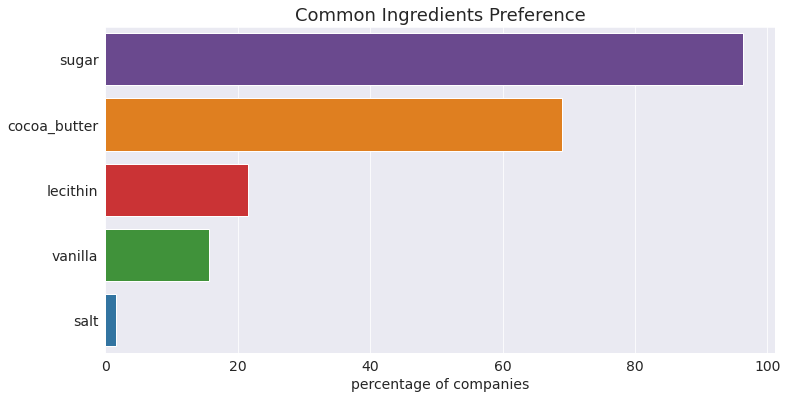

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=ingredients_percentage,y=ingredients_percentage.index, palette="Paired_r")
plt.title("Common Ingredients Preference")
plt.xlabel('percentage of companies');

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary:**<br>
Sugar is the most common ingredient, followed by cocoa butter, lecithin and vanilla. Salt is least preferred by companies.    
    
<!-- </blockquote> -->

***
### <font color=green><u>2. Tastes</u> </font>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->

In the dataset, in column description, we noticed that there is data of first taste, second, third and fourth taste. Lets look into all the tastes, all the common tastes which is switched between these four, most common tastes in each of these four categories and finally draw a venn diagram to get a better view. 
<br>   
Hence, here we can learn all the different tastes present, tastes preferred as first, second and third. Since, fourth taste is rarely there, lets ignore this column for now.<br>
Some functions we explore in this section are:

* ```pandas.Series.ravel```
> __Format:__ ```Series.ravel(order='C')```<br>
> Returns the flattened underlying data as an numpy.ndarray or ndarray-like

* ```pandas.unique```
> __Format:__ ```pandas.unique(values)```<br>
> Uniques are returned in order of appearance, though this does NOT sort.<br>
> Significantly faster than numpy.unique. Includes NA values.

* ```pandas.DataFrame.count```
> __Format:__ ```DataFrame.count(axis=0, level=None, numeric_only=False)```<br>
> Counts non-NA cells for each column or row. The values None, NaN, NaT, and optionally numpy.inf (depending on pandas.options.mode.use_inf_as_na) are considered NA.

* ```pandas.DataFrame.size```
> __Format:__ ```property DataFrame.size```<br>
> Return an int representing the number of elements in this object. Returns the number of rows if Series. Otherwise returns the number of rows times number of columns if DataFrame.

* ```pandas.DataFrame.head```
> __Format:__ ```DataFrame.head(n=5)```<br>
> This function returns the first n rows for the object based on position. It is useful for quickly testing if an object has the right type of data in it.<br>
> For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n].<br>

* Functions provided by ```matplotlib-venn``` for plotting area-proportional two- and three-way _Venn diagrams_ in matplotlib.<br>
> The functions ```venn2_circles``` and ```venn3_circles``` draw just the circles, whereas the functions ```venn2``` and ```venn3``` draw the diagrams as a collection of colored patches, annotated with text labels.<br> To install:<br>
> ```pip install matplotlib-venn```    
    
<!-- </blockquote> -->

In [42]:
# various tastes
column_values = chocolate_df[["first_taste", "second_taste", "third_taste"]].values.ravel()
unique_values =  pd.unique(column_values)
unique_values.size

839

In [43]:
# first_taste preference among companies as percentage 
first_taste = chocolate_df.first_taste.value_counts() * 100 / chocolate_df.first_taste.count()
first_taste.head(10)

creamy     7.194245
sandy      5.755396
intense    3.642086
nutty      3.417266
fatty      3.327338
sweet      3.102518
sticky     2.697842
dry        2.517986
gritty     2.428058
roasty     2.158273
Name: first_taste, dtype: float64

In [44]:
# second_taste preference among companies as percentage 
second_taste = chocolate_df.second_taste.value_counts() * 100 / chocolate_df.second_taste.count()
second_taste.head(10)

sweet     5.356311
nutty     3.865859
earthy    3.260363
roasty    3.027480
cocoa     2.980904
floral    2.701444
fatty     2.282254
spicy     2.002795
woody     1.909641
sour      1.863065
Name: second_taste, dtype: float64

In [45]:
# third_taste preference among companies as percentage 
third_taste = chocolate_df.third_taste.value_counts() * 100 / chocolate_df.third_taste.count()
third_taste.head(10)

cocoa     5.860349
nutty     4.364090
roasty    4.301746
sour      3.865337
earthy    2.992519
sweet     2.743142
coffee    2.306733
spicy     1.932668
bitter    1.558603
floral    1.558603
Name: third_taste, dtype: float64

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Since having three tastes is pretty common, we consider ```first_taste```, ```second_taste``` and ```third_taste``` data from our ```chocolate_df``` dataframe. As this is a _three-circle_ case, we will be using ```venn3``` function.   
    
<!-- </blockquote> -->

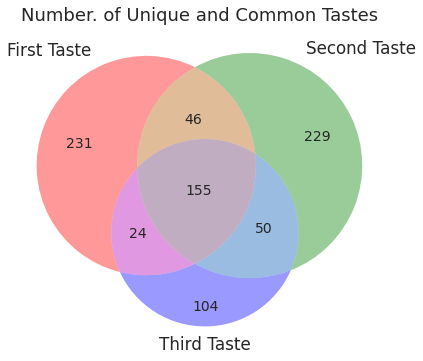

In [46]:
!pip install matplotlib-venn --quiet
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

first_taste = set(chocolate_df['first_taste'])
second_taste = set(chocolate_df['second_taste'])
third_taste = set(chocolate_df['third_taste'])

plt.figure(figsize=(12,6)) 
venn3([first_taste, second_taste, third_taste], ('First Taste', 'Second Taste', 'Third Taste'))
plt.title("Number. of Unique and Common Tastes")
plt.show();

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Next, we use ```list(set(df1.A) & set(df2.A) & set(df3.A))``` to find total common tastes.    
    
<!-- </blockquote> -->

In [47]:
# common tastes
a = list(first_taste & second_taste & third_taste)
len(a)

155

***
### <font color=green> <u>3. Percentage of Cocoa and Variation Over Years</u> </font> 


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Let's  use ```seaborn.lineplot``` this time to draw a line plot with possibility of several semantic groupings.<br>
> __Format:__ ```seaborn.lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)```<br>
> By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:    
    
<!-- </blockquote> -->

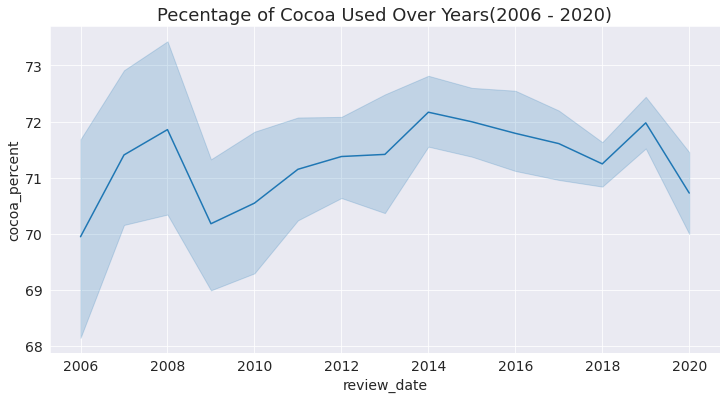

In [48]:
plt.figure(figsize=(12,6)) 
sns.lineplot(x=chocolate_df.review_date, y=chocolate_df.cocoa_percent)
plt.title("Pecentage of Cocoa Used Over Years(2006 - 2020)");

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary:**<br>
In 2009, less cocoa amount in chocolate bars was popular, but 71-73% cocoa is generally popular over the years. So, 71-73% cocoa is a safe bet!    
    
<!-- </blockquote> -->

***
### <font color=green> <u>4. Rating and Cocoa Percent</u> </font> 

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->

Let's see how _cocoa_ amount in chocoloate bars affects its rating.
<br><br>
In this section we explore how the dependence of two variables can be analyzed w.r.t. each other. We can use _joint plot_. A ```jointplot``` augments a bivariate relational or distribution plot with the marginal distributions of the two variables.<br>
In short. we visualize how rating & cocoa amount vary using the ```jointplot``` function from ```seaborn```.<br>
> __Format:__ ```jointplot(x, y[, data, kind, stat_func, ...])```<br>
> Setting a different ```kind="kde"``` in ```jointplot()``` basically combines two different plots._KDE_ shows the density where the points match up the most . Therefore, It is used to draw a plot of two variables with bivariate and univariate graphs.<br>
> A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. Several other figure-level plotting functions in seaborn make use of the ```histplot()``` and ```kdeplot()``` functions.<br>
> x and y are two strings that are the column names and the data that column contains is used by specifying the data parameter.
here we can see ```cocoa_percent``` on the _y axis_ and ```rating``` on the _x axis_.
    
    
<!-- </blockquote> -->

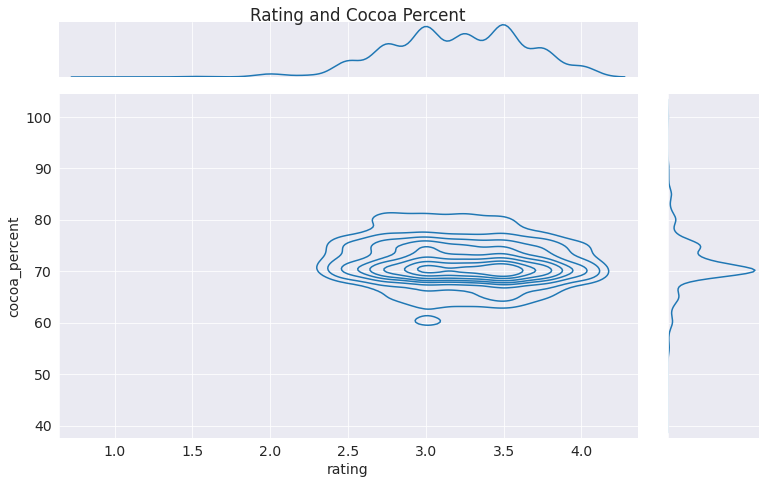

In [49]:
plt_s = sns.jointplot(x=chocolate_df.rating, y=chocolate_df.cocoa_percent, kind ='kde');
plt_s.fig.suptitle("Rating and Cocoa Percent")
plt_s.ax_joint.collections[0].set_alpha(0)
plt_s.fig.tight_layout()
plt_s.fig.subplots_adjust(top=0.95)
plt_s.fig.set_figwidth(12)
plt_s.fig.set_figheight(7);

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary**<br>

As noticed in previous section 71-73% cocoa being popular among the years. Here, its proved that this generous amount is a safe bet for decent rating. And it is certainly NOT the case that higher the amount of cocoa, higher the rating, though lesser amount of cocoa than average is also a good risk.     
    
<!-- </blockquote> -->

***
### <font color=green><u>5. Correlation between different columns</u> </font>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
To see interdependence between two or more variables, use correlation method ```pandas.DataFrame.corr```. Then we can, check all the correlations simultaneously.
> __Format:__ ```DataFrame.corr(method='pearson', min_periods=1)```<br>
> Computes pairwise correlation of columns, excluding NA/null values.<br>
> Returns : A DataFrame (Correlation matrix).<br>
> The _Pearson method_ is used by default, but the _Pandas_ allows the use of other indexes.<br>

> * 0.9 to 1 positive or negative indicates a very strong correlation.<br>
> * 0.7 to 0.9 positive or negative indicates a strong correlation.<br>
> * 0.5 to 0.7 positive or negative indicates a moderate correlation.<br>
> * 0.3 to 0.5 positive or negative indicates a weak correlation.<br>
> * 0 to 0.3 positive or negative indicates a negligible corr<br>

To facilitate this visualization of the correlations, it is possible to use the colors. Let's use the ```heatmap``` function in ```seaborn```.
> ```seaborn.heatmap```<br>
> __Format:__ ```seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)```<br>
> Plots rectangular data as a color-encoded matrix.<br>
> Annotates each cell with the numeric value using integer formatting.<br>
> The color gradation is observed in relation to the positive and negative correlations.<br>    
    
<!-- </blockquote> -->

In [50]:
rating_and_composition = chocolate_df[['rating',
    'cocoa_percent',
    'counts_of_ingredients',
    'cocoa_butter',
    'vanilla',
    'lecithin',
    'salt',
    'sugar']]
rating_and_composition

,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar
0,3.75,76.0,3,True,False,False,False,True
1,3.50,76.0,3,True,False,False,False,True
2,3.25,76.0,3,True,False,False,False,True
3,3.75,63.0,4,True,False,True,False,True
4,3.50,70.0,4,True,False,True,False,True
...,...,...,...,...,...,...,...,...
2219,2.75,80.0,4,True,False,False,True,False
2220,3.75,75.0,3,True,False,False,False,True
2221,3.50,72.0,3,True,False,False,False,True
2222,3.25,70.0,3,True,False,False,False,True


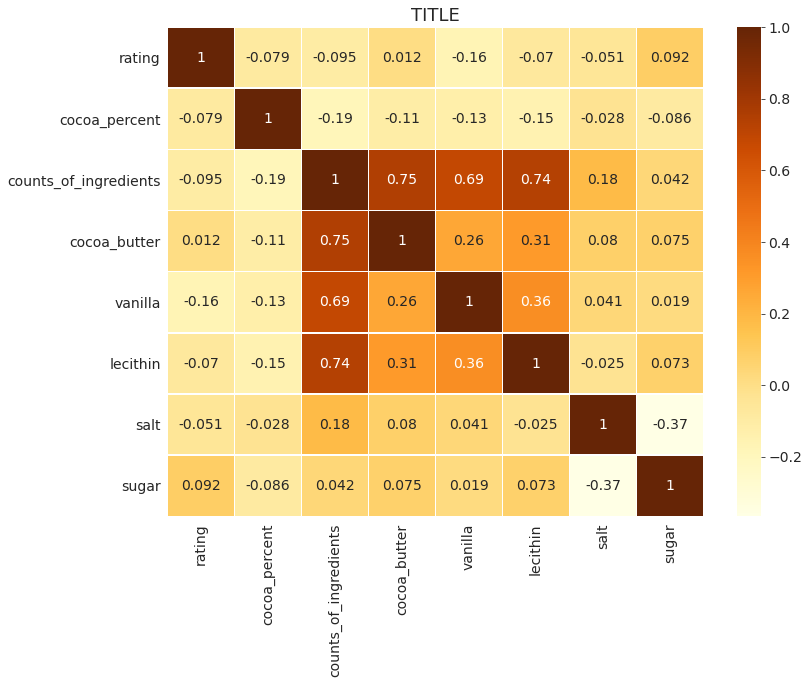

In [51]:
plt.figure(figsize=(12,9)) 
Chocolate_corr = rating_and_composition.corr()
sns.heatmap(Chocolate_corr, xticklabels=Chocolate_corr.columns, yticklabels=Chocolate_corr.columns, annot=True, cmap='YlOrBr',linewidths=.5)
plt.title("TITLE");

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary**<br>
From the measuring chart in section introduction, we can see _lecithin and cocoa butter;_ or  _lecithin and vanilla_ have a weak correlation whereas _vanilla and rating_; _cocoa percent and cocoa butter/lecithin/vanilla_ have negligible correlation.    
    
<!-- </blockquote> -->

***

## <a id="QA"><font color=blue><u>__Questions and Answers__</u></font></a>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;"> -->
    
Now all that analysis and visualization in previous section have made us more curious about the whole dataset. Let's look into some common questions that comes to the mind and try to solve the same.
    
<!-- </blockquote> -->

### <font color=green><u> Q1. How presence of cocoa butter and lecithin effect rating in latest three years (2018-2020)?</u> </font>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
To lower the viscosity of chocolate and to actually bind the ingredients, both of these element serves this big purpose. But the question is which of these is popular. Well actually cocoa butter is always the better option but its relatively expensive. Next option is to use both of these in right quantities or use only lecithin to produce cheapest variety of chocolates. In this section, lets check, how these factors effect chocolate bar rating.    
***  
We create ```cocoa_or_lecithin_all``` for the present data in consideration. Then lets create ```cocoa_or_lecithin``` which only has last 3 years data from dataframe ```cocoa_or_lecithin_all```. We move '```cocoa_butter```' and '```lecithin```' to the ```index``` and then ```unstack``` them. This action will assume we have only one (lecithin, cocoa_butter) combination per rating.<br>
```Stacking``` a DataFrame means moving (also rotating or pivoting) the innermost column index to become the innermost row index and yes as you guessed, the inverse operation is called _unstacking_ which means moving the innermost row index to become the innermost column index again.

Here we will be using visualization function:
```pandas.DataFrame.plot```<br>
> __Format:__ ```DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)```<br>
> Make plots of a Series or a DataFrame. 
<!-- </blockquote> -->

In [52]:
cocoa_or_lecithin_all = chocolate_df[['review_date','rating','cocoa_butter','lecithin']].copy()
cocoa_or_lecithin = cocoa_or_lecithin_all[(cocoa_or_lecithin_all.review_date >= 2018) & (cocoa_or_lecithin_all.review_date <= 2020)].reset_index(drop=True)
cocoa_or_lecithin

,review_date,rating,cocoa_butter,lecithin
0,2019,3.75,True,False
1,2019,3.50,True,False
2,2019,3.25,True,False
3,2018,3.75,True,True
4,2018,3.50,True,True
...,...,...,...,...
448,2018,3.00,True,False
449,2018,3.00,True,False
450,2018,3.50,True,False
451,2018,3.25,True,False


In [53]:
cocoa_or_lecithin.set_index(['cocoa_butter', 'lecithin'], append=True, inplace=True)

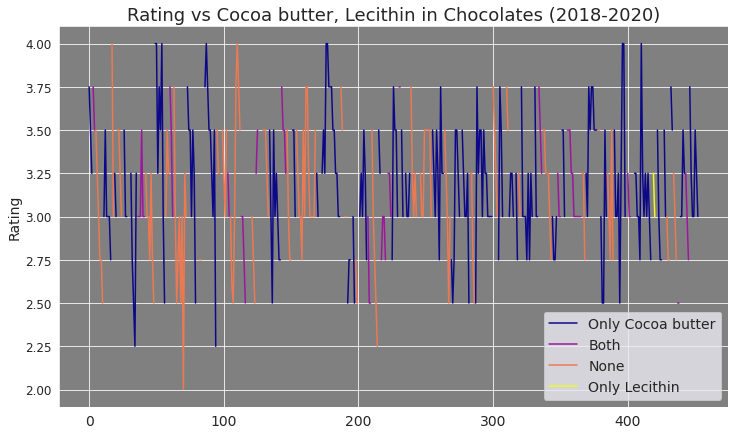

In [54]:
cocoa_or_lecithin_df = cocoa_or_lecithin.unstack(['cocoa_butter', 'lecithin']).xs('rating',axis=1).plot(figsize=(12,7), colormap='plasma')
cocoa_or_lecithin_df.legend(["Only Cocoa butter", "Both","None","Only Lecithin"], prop={'size':14})
plt.title("Rating vs Cocoa butter, Lecithin in Chocolates (2018-2020)", fontsize=18)
plt.ylabel("Rating", fontsize=14)
plt.yticks(fontsize=12)
cocoa_or_lecithin_df.set_facecolor("grey");

# cocoa_butter, lecithin
# True, False  (Only Cocoa butter)
# True, True   (Both)
# False, False (None)
# False, True  (Only Lecithin)

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary:**<br>
As we can see here using both cocoa butter and lecithin does equally good. But only adding Cocoa butter does have better chances in gaining good score.    
    
<!-- </blockquote> -->

***
### <font color=green><u> Q2. How much cocoa is actually preferred by top companies?</u> </font>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
We use ```pandas.DataFrame.max``` here:
> __Format__ ```DataFrame.max(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)```<br>
> Returns the maximum of the values for the requested axis.    
    
<!-- </blockquote> -->

In [55]:
top_rated_df = chocolate_df[chocolate_df.rating == chocolate_df.rating.max()]
top_rated_df

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste,fourth_taste
5,A. Morin,France,Venezuela,2013,4.0,70.0,4,True,False,True,False,True,oily,nut,caramel,raspberry
6,A. Morin,France,Peru,2013,4.0,63.0,3,True,False,False,False,True,sweet,cocoa,tangerine,NaN
16,A. Morin,France,Peru,2014,4.0,70.0,4,True,False,True,False,True,delicate,hazelnut,brownie,NaN
72,Amano,U.S.A,Ecuador,2010,4.0,70.0,4,True,True,False,False,True,strong spice,intense pepper,NaN,NaN
75,Amano,U.S.A,Papua new guinea,2011,4.0,70.0,4,True,True,False,False,True,tart,lemon,smoke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,Valrhona,France,Venezuela,2011,4.0,64.0,5,True,True,True,False,True,creamy,honey,peanut butter,NaN
2116,Valrhona,France,Venezuela,2012,4.0,69.0,5,True,True,True,False,True,green,unripened fruit,banana,NaN
2119,Valrhona,France,Peru,2015,4.0,63.0,5,True,True,True,False,True,intense,dark berry,grapes,NaN
2162,Willie's Cacao,U.k.,Colombia,2016,4.0,70.0,3,True,False,False,False,True,rich cocoa,spicy,cinamon,NaN


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Let's check percentage of cocoa each of these top companies have.
To plot a histogram, we use ```matplotlib.pyplot.hist``` here.
> __Format:__ ```matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)[source]```    
    
<!-- </blockquote> -->

In [56]:
# number_of_companies = len(top_rated_df[(top_rated_df.cocoa_percent >= 60) & (top_rated_df.cocoa_percent < 70)].index)
# number_of_companies

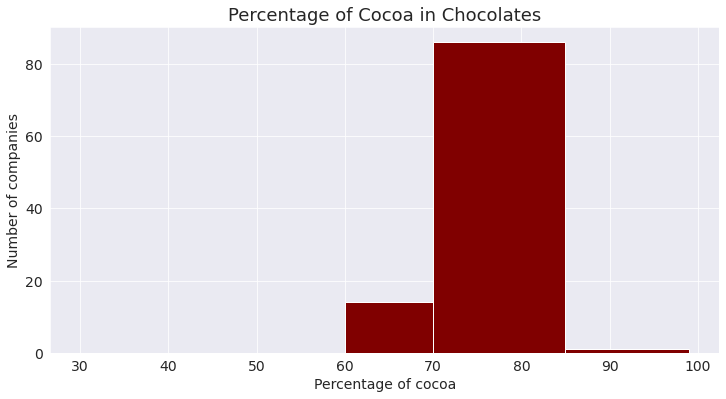

In [57]:
plt.figure(figsize=(12,6)) 
plt.title("Percentage of Cocoa in Chocolates")
plt.xlabel('Percentage of cocoa')
plt.ylabel('Number of companies')
plt.hist(top_rated_df.cocoa_percent, bins=[30, 50, 60, 70, 85, 99], color='maroon');

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary:**<br>

Chocolate is broadly classified by the amount of cocoa it contains. And generally, over 70% cocoa is dark chocolate. Therefore, this implies, many top rated companies have preferred manufacturing dark chocolates over other versions of chocolates.    
    
<!-- </blockquote> -->

***
### <font color=green><u> Q3. From which countries, top companies import cocoa beans?</u> </font>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
Note: If _x-axis_ labels that are too long for comfortable display, there’s two options in this case –<br>
rotating the labels to make a bit more space, or rotating the entire chart to end up with a horizontal bar chart.<br>
The ```xticks``` function from ```Matplotlib``` is used here, with the rotation.
> The Matplotlib “```xtick```” function is used to rotate the labels on axes, allowing for longer labels when needed.    
    
<!-- </blockquote> -->

In [58]:
top_bean_countries= top_rated_df.country_of_bean_origin.value_counts()
top_bean_countries

Venezuela           18
Peru                16
Madagascar          10
Ecuador              8
Blend                7
Colombia             5
Bolivia              5
Papua new guinea     4
Brazil               4
Guatemala            3
Mexico               3
Haiti                3
Ghana                2
Costa rica           2
Nicaragua            2
Belize               2
St. lucia            1
Vietnam              1
Tanzania             1
Indonesia            1
Jamaica              1
Sao tome             1
Solomon islands      1
Name: country_of_bean_origin, dtype: int64

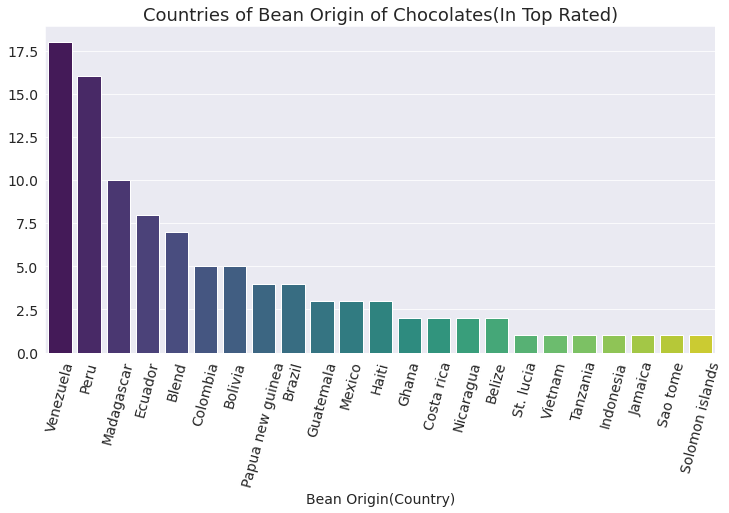

In [59]:
plt.figure(figsize=(12,6)) 
plt.xticks(rotation=75)
plt.title('Countries of Bean Origin of Chocolates(In Top Rated)')
sns.barplot(x=top_bean_countries.index, y=top_bean_countries, palette="viridis")
plt.xlabel("Bean Origin(Country)")
plt.ylabel("");

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary**<br>
It can be seen that most of these countries are _'developing~countries'_.    
    
<!-- </blockquote> -->

***
### <font color=green><u> Q4. What must have been the recipe of top rated chocolate in the year 2019?</u> </font>

In [60]:
top_rated_recent = top_rated_df[(top_rated_df.review_date >= 2016) & (top_rated_df.review_date <= 2020)]
top_rated_recent

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste,fourth_taste
121,Arete,U.S.A,Costa rica,2016,4.0,70.0,2,False,False,False,False,True,balanced,cherry,choco,NaN
122,Arete,U.S.A,Peru,2016,4.0,70.0,2,False,False,False,False,True,creamy,complex,balanced,NaN
134,Arete,U.S.A,Bolivia,2017,4.0,70.0,2,False,False,False,False,True,creamy,bright fruit,NaN,NaN
135,Arete,U.S.A,Haiti,2017,4.0,70.0,2,False,False,False,False,True,long lasting,cocoa,NaN,NaN
140,Arete,U.S.A,Colombia,2018,4.0,70.0,2,False,False,False,False,True,smooth,nutty,cocoa,NaN
300,Bonnat,France,Peru,2018,4.0,75.0,3,True,False,False,False,True,oily,subtle,mild coffee,NaN
301,Bonnat,France,Blend,2018,4.0,75.0,3,True,False,False,False,True,creamy,rich,complex,NaN
317,Brasstown aka It's Chocolate,U.S.A,Bolivia,2018,4.0,70.0,3,True,False,False,False,True,nuts,fruit,NaN,NaN
443,Castronovo,U.S.A,Belize,2016,4.0,72.0,3,True,False,False,False,True,bright fruit,molasses,nutty,NaN
516,Christopher Elbow,U.S.A,Brazil,2019,4.0,70.0,3,True,False,False,False,True,creamy,dried fruit,nutty,NaN


***
#### <a id="function1"><font color=green>2019 recipe:</font></a>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
We have been displaying dataframes. But it gets boring to look into same design every~time. For this special display of _**recipe**_, let's add background color. We will use:<br>
```df.style.set_properties```
> By using this, we can use inbuilt functionality to manipulate data frame styling from font color to background color.<br>
> ```DataFrame.style``` property, returns styler object having a number of useful methods for formatting and visualizing the data frames.    
    
<!-- </blockquote> -->

In [61]:
recipe_df = top_rated_recent[(top_rated_recent.review_date == 2019)]
recipe_df = recipe_df[['company',
    'company_location',               
    'cocoa_percent',    
    'cocoa_butter',
    'vanilla',
    'lecithin',
    'salt',
    'sugar',
    'first_taste',
    'second_taste',
    'third_taste'                        
    ]]
recipe_df = recipe_df.set_index('company')
recipe_df.style.set_properties(**{'background-color': 'brown', 
                           'color': 'yellow'})

,company_location,cocoa_percent,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste
company,,,,,,,,,,
Christopher Elbow,U.S.A,70.000000,True,False,False,False,True,creamy,dried fruit,nutty
Dick Taylor,U.S.A,72.000000,False,False,False,False,True,creamy,sticky,dried fruit
Taste Artisan,U.S.A,75.000000,True,False,False,False,True,fig,nan,nan


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary**<br>
Well top recipe does indicate dark chocolate. One of the recipe being using only cocoa butter and sugar over lecithin where it has creamy, fruity & nutty tastes. Another being cocoa butter and sugar with fig as the only taste.   
    
<!-- </blockquote> -->

***
### <font color=green><u> Q5. What are the major regions of chocolate, companies of which, generally makes it to Top 50?</u> </font>


<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #f2e6ff; padding: 1em; margin:24px;"> -->
    
In short, Countries with most companies in Top 50 <br>
We take average rating of each company here.<br>
**NOTE:** If you need to work with a dataframe after aggregation, use ```as_index=False```     
    
<!-- </blockquote> -->

In [62]:
chocolate_df

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,first_taste,second_taste,third_taste,fourth_taste
0,5150,U.S.A,Madagascar,2019,3.75,76.0,3,True,False,False,False,True,cocoa,blackberry,full body,NaN
1,5150,U.S.A,Dominican republic,2019,3.50,76.0,3,True,False,False,False,True,cocoa,vegetal,savory,NaN
2,5150,U.S.A,Tanzania,2019,3.25,76.0,3,True,False,False,False,True,rich cocoa,fatty,bready,NaN
3,A. Morin,France,Peru,2012,3.75,63.0,4,True,False,True,False,True,fruity,melon,roasty,NaN
4,A. Morin,France,Bolivia,2012,3.50,70.0,4,True,False,True,False,True,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,Blend,2014,2.75,80.0,4,True,False,False,True,False,waxy,cloying,vegetal,NaN
2220,Zotter,Austria,Colombia,2017,3.75,75.0,3,True,False,False,False,True,strong nutty,marshmallow,NaN,NaN
2221,Zotter,Austria,Belize,2018,3.50,72.0,3,True,False,False,False,True,muted,roasty,accessible,NaN
2222,Zotter,Austria,Congo,2018,3.25,70.0,3,True,False,False,False,True,fatty,mild nuts,mild fruit,NaN


In [63]:
average_rating_df = chocolate_df.groupby(['company','company_location'], as_index=False)[['rating']].mean()
average_rating_df

,company,company_location,rating
0,5150,U.S.A,3.500000
1,A. Morin,France,3.400000
2,AMMA,Brazil,3.500000
3,Acalli,U.S.A,3.562500
4,Adi aka Fijiana (Easy In Ltd),Fiji,3.250000
...,...,...,...
501,hexx,U.S.A,2.925000
502,iQ Chocolate,Scotland,2.875000
503,organicfair,Canada,2.850000
504,organicfair,South africa,3.000000


In [64]:
top_fifty_df = average_rating_df.sort_values('rating', ascending=False).head(50)
top_fifty_df

,company,company_location,rating
352,Ocelot,Scotland,3.875000
225,Heirloom Cacao Preservation (Zokoko),U.S.A,3.875000
303,Matale,Australia,3.812500
371,Patric,U.S.A,3.791667
233,Idilio (Felchlin),Switzerland,3.775000
343,Nikoa,Ecuador,3.750000
102,Chocola'te,U.S.A,3.750000
251,Kerchner,U.S.A,3.750000
461,Timo A. Meyer,Germany,3.750000
351,Obolo,Chile,3.750000


In [65]:
top_countries= top_fifty_df.company_location.value_counts()
top_countries

U.S.A             26
Japan              3
Australia          3
Canada             2
Germany            2
Spain              2
Italy              1
Switzerland        1
Czech republic     1
Ecuador            1
France             1
Argentina          1
Denmark            1
Chile              1
New zealand        1
Madagascar         1
Scotland           1
Belgium            1
Name: company_location, dtype: int64

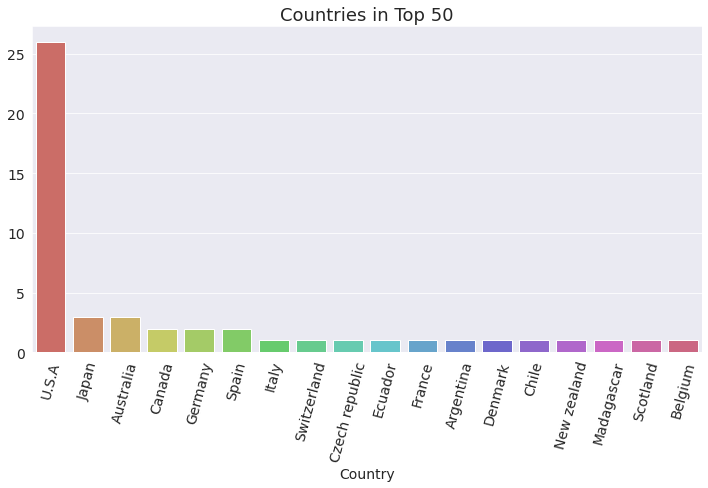

In [66]:
plt.figure(figsize=(12,6)) 
plt.xticks(rotation=75)
plt.title('Countries in Top 50')
sns.barplot(x=top_countries.index, y=top_countries, palette="hls")
plt.xlabel("Country")
plt.ylabel("");

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #e6ccff; padding: 1em; margin:24px;"> -->
    
**Summary:**<br>
In top 50, most companies are from U.S.A who generally get best ratings on an average, followed by Japan and Australia. But looking at most of these countries, it is implied that most of these are developed countries.    
    
<!-- </blockquote> -->

***

## <a id="IC"><font color=blue><u>__Inferences and Conclusion__</u></font></a>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;"> -->

* 71-73% cocoa is a safe bet as dark chocolates are gaining popularity over the years!
* There is atleast 155 common tastes which is preferred for first, second and third tastes.
* Sugar is the most common ingredient, followed by cocoa butter, lecithin and vanilla.
* Adding only cocoa butter over lecithin does have better chances in gaining good score.
* Beans are mostly originated in developing countries and is exported to developed countries.
    
<!-- </blockquote> -->

***

## <a id="RF"><font color=blue><u>__References and Future Work__</u></font></a>

<!-- <blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;"> -->

* **_Reference Links:_**<br>
    * [dataset](https://www.kaggle.com/soroushghaderi/chocolate-bar-2020)
    * [seaborn](http://seaborn.pydata.org/)
    * [visualization](https://pandas.pydata.org/pandas-docs/version/0.9.1/visualization.html)
    * [pandas.DataFrame.xs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html)
    * [pandas-docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
    * [center-a-matplotlib-figure](https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/)
    * [visualization-with-pandas-plot](https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/)
    * [color_palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
    * [colormaps](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)
    * [visualizing_set_diagrams](https://monstott.github.io/visualizing_set_diagrams_with_python)
    * [if-condition-in-pandas](https://datatofish.com/if-condition-in-pandas-dataframe/)
    * [python-lambda-functions](https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/)
    * [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
    * [find-the-unique-values-in-multiple-columns](https://www.kite.com/python/answers/how-to-find-the-unique-values-in-multiple-columns-of-a-pandas-dataframe-in-python)
    * [medium.com/dunder-data](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c)
    * [matplotlib-venn](https://pypi.org/project/matplotlib-venn/)
    * [seaborn-distribution-plots](https://www.geeksforgeeks.org/seaborn-distribution-plots/)
    * [area-plot](https://pythontic.com/pandas/dataframe-plotting/area-plot)
    * [correlation](https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c)
    * [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
    * [the-art-of-subplots](https://towardsdatascience.com/master-the-art-of-subplots-in-python-45f7884f3d2e)
    * [set-the-spacing-between-subplots](https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python)
    * [pandas-dataframe-background-color](https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/)
    * [stack-and-unstack-explained](https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)
    * [stackoverflow.com](https://stackoverflow.com/questions/19060144/more-efficient-matplotlib-stacked-bar-chart-how-to-calculate-bottom-values)
    * [www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#:~:text=Stacked%20bar%20plots,-In%20the%20stacked&text=Pandas%20makes%20this%20easy%20with,each%20x%2Daxis%20tick%20mark.)
    * [scentellegher.github.io/programming](https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html)
<br>
***
* **_Future Work:_**<br>
This dataset can be combined with respective company market data to know more about sales and shares. But for starters, the next immediate step can be, building a real-world machine learning model. For example, by looking at this dataset, the target ‘rating’ can be predicted with the help of many useful features here such as 'company', 'company_location', ‘country_of_bean_origin', all the ingredients and tastes we have explored & analysed here. If we can do so, for this historical data, then we should be able to estimate ratings for new/future data too.
    
<!-- </blockquote> -->

In [67]:
# project_name = "Chocolate-bar-recipe-trend-analysis-2020"

In [68]:
# !pip install jovian --upgrade -q

In [69]:
# import jovian

In [70]:
# jovian.commit(project=project_name, files=['chocolate-bar-2020/chocolate.csv'])

### <font color=pink>_This article is written by Monika Rabha.<br> Thank You :)_</font>